# **Project Name**    - Unsupervised ML- Zomato Restaurant Clustering 



##### **Project Type**    - Unsupervised Machine Learning Project
##### **Contribution**    - Individual
##### **Apurba Koirala**


# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

https://github.com/apurbaaaa/Zomato

# **Problem Statement**


**Write Problem Statement Here.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [93]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy.sparse import vstack
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from kmodes.kmodes import KModes
from kmodes.kprototypes import KPrototypes
import re
import contractions
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.tag import pos_tag
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder, MultiLabelBinarizer, StandardScaler
from sklearn.decomposition import PCA

### Dataset Loading

In [2]:
# Load Dataset
names = pd.read_csv("Zomato Restaurant names and Metadata.csv")
reviews = pd.read_csv("Zomato Restaurant reviews.csv")

### Dataset First View

In [3]:
# Dataset First 
names.head()

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


In [4]:
reviews.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
print("Names and Metadata count: ", names.shape)
print("Reviews count: ", reviews.shape)

Names and Metadata count:  (105, 6)
Reviews count:  (10000, 7)


### Dataset Information

In [6]:
# Dataset Info
names.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.1+ KB


In [7]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


In [8]:
print(reviews['Restaurant'].nunique())

100


#### Duplicate Values

In [9]:
# Dataset Duplicate Value Count
print("Duplicated Value Count in Names and Metadata: ", names.duplicated().sum(), "\n")
print("Duplicated Value Count in Reviews: ", reviews.duplicated().sum(), "\n")

Duplicated Value Count in Names and Metadata:  0 

Duplicated Value Count in Reviews:  36 



#### Missing Values/Null Values

In [10]:
# Missing Values/Null Values Count
print("Duplicated Value Count in Names and Metadata: ", names.isnull().sum(), "\n")
print("Duplicated Value Count in Reviews: ", reviews.isnull().sum(), "\n")

Duplicated Value Count in Names and Metadata:  Name            0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64 

Duplicated Value Count in Reviews:  Restaurant     0
Reviewer      38
Review        45
Rating        38
Metadata      38
Time          38
Pictures       0
dtype: int64 



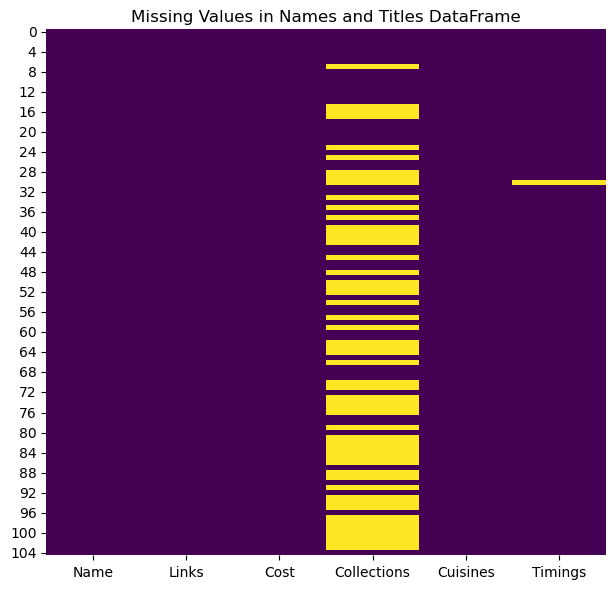

In [11]:
# Visualizing the missing values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.heatmap(names.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values in Names and Titles DataFrame")

plt.tight_layout()
plt.show()

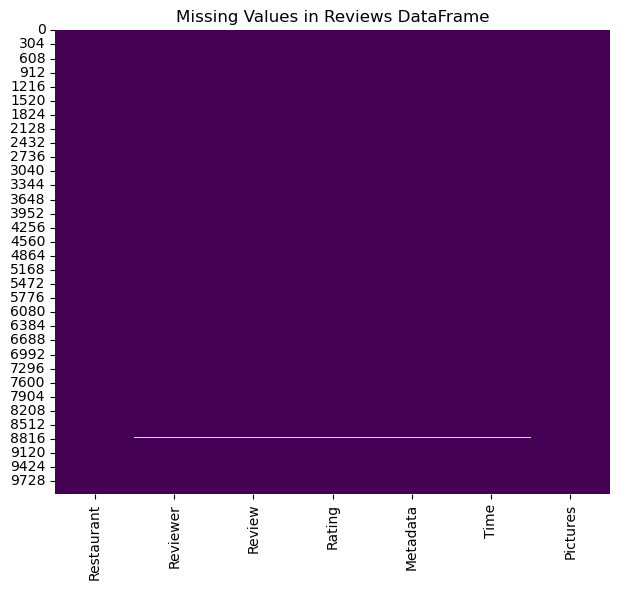

In [12]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.heatmap(reviews.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values in Reviews DataFrame")

plt.tight_layout()
plt.show()

### What did you know about your dataset?

Answer Here

## ***2. Understanding Your Variables***

In [13]:
# Dataset Columns
names.columns

Index(['Name', 'Links', 'Cost', 'Collections', 'Cuisines', 'Timings'], dtype='object')

In [14]:
reviews.columns

Index(['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time',
       'Pictures'],
      dtype='object')

In [15]:
# Dataset Describe
names.describe()

,Name,Links,Cost,Collections,Cuisines,Timings
count,105,105,105,51,105,104
unique,105,105,29,42,92,77
top,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,500,Food Hygiene Rated Restaurants in Hyderabad,"North Indian, Chinese",11 AM to 11 PM
freq,1,1,13,4,4,6


In [16]:
reviews.describe()

,Pictures
count,10000.000000
mean,0.748600
std,2.570381
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,64.000000


### Variables Description

Answer Here

### Check Unique Values for each variable.

In [17]:
# Check Unique Values for each variable.
names.nunique()

Name           105
Links          105
Cost            29
Collections     42
Cuisines        92
Timings         77
dtype: int64

In [18]:
reviews.nunique()

Restaurant     100
Reviewer      7446
Review        9364
Rating          10
Metadata      2477
Time          9782
Pictures        36
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [19]:
reviews.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


In [20]:
# Write your code to make your dataset analysis ready.
# Remove non-numeric rating values
# reviews = reviews[reviews['Rating'] != 'Like']
# Remove non-numeric rating values
reviews = reviews[reviews['Rating'] != 'Like']

# Fill missing values in 'Collections' column
names['Collections'].fillna('No Collections Available', inplace=True)

# Drop rows where the 'Review' column is null
reviews.dropna(subset=['Review'], inplace=True)

# Fill missing values in 'Timings' column
names['Timings'].fillna("Unknown", inplace=True)

# Remove duplicate reviews
reviews.drop_duplicates(keep='first', inplace=True)


/var/folders/vf/64r8j3px5m7_0cwl_br4gt2c0000gn/T/ipykernel_27041/2888109555.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  names['Collections'].fillna('No Collections Available', inplace=True)
/var/folders/vf/64r8j3px5m7_0cwl_br4gt2c0000gn/T/ipykernel_27041/2888109555.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we a

In [21]:
print("Duplicated Value Count in Names and Metadata: ", names.duplicated().sum(), "\n")
print("Duplicated Value Count in Reviews: ", reviews.duplicated().sum(), "\n")

Duplicated Value Count in Names and Metadata:  0 

Duplicated Value Count in Reviews:  0 



In [22]:
reviews['Rating'] = pd.to_numeric(reviews['Rating'], errors='coerce')

# Calculate the average rating per restaurant
average_ratings = reviews.groupby('Restaurant')['Rating'].mean()

# Merge the average ratings back into the original DataFrame
reviews['average_rating'] = reviews['Restaurant'].map(average_ratings)

reviews.head()
reviews.drop("Rating", axis = 1)

,Restaurant,Reviewer,Review,Metadata,Time,Pictures,average_rating
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...","1 Review , 2 Followers",5/25/2019 15:54,0,4.280
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,"3 Reviews , 2 Followers",5/25/2019 14:20,0,4.280
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,"2 Reviews , 3 Followers",5/24/2019 22:54,0,4.280
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,"1 Review , 1 Follower",5/24/2019 22:11,0,4.280
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,"3 Reviews , 2 Followers",5/24/2019 21:37,0,4.280
...,...,...,...,...,...,...,...
9995,Chinese Pavilion,Abhishek Mahajan,Madhumathi Mahajan Well to start with nice cou...,"53 Reviews , 54 Followers",6/5/2016 0:08,0,3.745
9996,Chinese Pavilion,Sharad Agrawal,This place has never disappointed us.. The foo...,"2 Reviews , 53 Followers",6/4/2016 22:01,0,3.745
9997,Chinese Pavilion,Ramandeep,"Bad rating is mainly because of ""Chicken Bone ...","65 Reviews , 423 Followers",6/3/2016 10:37,3,3.745
9998,Chinese Pavilion,Nayana Shanbhag,I personally love and prefer Chinese Food. Had...,"13 Reviews , 144 Followers",5/31/2016 17:22,0,3.745


In [23]:
aggregated_reviews = reviews.groupby('Restaurant').agg({
    'Reviewer': lambda x: ', '.join(x.unique()),  # Combine unique reviewer names
    'Review': lambda x: ' || '.join(x.dropna()),  # Concatenate reviews, handling NaNs
    'Rating': 'mean',  # Average rating for the restaurant
    'Pictures': 'max',
    'Time': 'min'  # Earliest review time (or max for latest)
}).reset_index()

In [24]:
aggregated_reviews.rename(columns={'Restaurant': 'Name', 'Time': 'earliest_review'}, inplace=True)

In [25]:
aggregated_reviews.head()

,Name,Reviewer,Review,Rating,Pictures,earliest_review
0,10 Downing Street,"Smrati Saxena, Jayaprakash Reddy, Ram K, Shrut...",I've been to this place about two times and i ...,3.80,11,1/13/2019 20:54
1,13 Dhaba,"Sarika, Ankur, Kumar Ajay, Henna Mittal, Yoges...",I didn't go and eat at the Dhaba.\nI had order...,3.48,6,1/1/2019 15:13
2,"3B's - Buddies, Bar & Barbecue","Kairamkonda Saikiran, Saiswapnil, Naveen, K Pr...",We go their for a team dinner.The name of the ...,4.76,3,4/15/2019 20:44
3,AB's - Absolute Barbecues,"Brave Stone, Ajayreddy Singireddy, Monika Pand...",It was excellent experience spiced thank Krish...,4.88,10,5/10/2019 22:55
4,Absolute Sizzlers,"Arun Sharma, Pallavi Mitra, Avi Ranjan, Raju, ...",Service was pathetic. Ordered a sizzler with l...,3.62,22,2/23/2019 23:55


In [26]:
df = names.merge(aggregated_reviews, on='Name', how='left')

In [27]:
df.head()
df.drop("Pictures", axis = 1)

,Name,Links,Cost,Collections,Cuisines,Timings,Reviewer,Review,Rating,earliest_review
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)","Rusha Chakraborty, Anusha Tirumalaneedi, Ashok...","The ambience was good, food was quite good . h...",4.28,5/10/2019 23:24
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM,"Subodh Deshmukh, BIBHU BHUSHAN SINHA, Behara V...",Paradise Biryani is really good service also g...,4.70,5/10/2019 21:35
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM","Vivek Vuppala, Jalaj Goyal, Teju Winni, Karthi...",We were 4 people who visited this place on Thu...,4.66,4/20/2019 15:40
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM,"Ashwi Sharma, Dasthagir Shaik, Ram Chowdary, A...","Haleem, the best place to try out.\nAvaialble ...",3.21,3/10/2019 13:35
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no...","Joel Coelho, Elizabeth Thomas, Piyush Singhal,...","Great ambience, met an excellent man - Sarbesh...",4.34,4/24/2019 23:34
...,...,...,...,...,...,...,...,...,...,...
100,IndiBlaze,https://www.zomato.com/hyderabad/indiblaze-gac...,600,No Collections Available,"Fast Food, Salad",11 AM to 11 PM,NaN,NaN,NaN,NaN
101,Sweet Basket,https://www.zomato.com/hyderabad/sweet-basket-...,200,No Collections Available,"Bakery, Mithai","10 AM to 10 PM (Mon-Thu), 8 AM to 10:30 PM (Fr...",NaN,NaN,NaN,NaN
102,Angaara Counts 3,https://www.zomato.com/hyderabad/angaara-count...,500,No Collections Available,"North Indian, Biryani, Chinese",12 Noon to 11 PM,NaN,NaN,NaN,NaN
103,Wich Please,https://www.zomato.com/hyderabad/wich-please-1...,250,No Collections Available,Fast Food,8am to 12:30AM (Mon-Sun),NaN,NaN,NaN,NaN


In [28]:
df["Review"].fillna("No review", inplace=True)
df["Rating"].fillna(df["Rating"].median(), inplace=True)
df.drop(["earliest_review", "Reviewer", "Links", "Pictures"], axis=1, inplace=True)

/var/folders/vf/64r8j3px5m7_0cwl_br4gt2c0000gn/T/ipykernel_27041/2131475259.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Review"].fillna("No review", inplace=True)
/var/folders/vf/64r8j3px5m7_0cwl_br4gt2c0000gn/T/ipykernel_27041/2131475259.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always

### What all manipulations have you done and insights you found?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

In [29]:
nltk.download("stopwords")
nltk.download("punkt")
nltk.download("averaged_perceptron_tagger")
nltk.download("wordnet")
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/apurbakoirala/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/apurbakoirala/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/apurbakoirala/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/apurbakoirala/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/apurbakoirala/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /Users/apurbakoirala/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date

True

In [30]:
stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

In [31]:
text_columns = ["Name", "Links", "Collections", "Cuisines", "Timings", "Reviewer", "Review"]

#### 1. Expand Contraction

In [32]:
# Expand Contraction
def preprocess_text(text):
    if not isinstance(text, str):
        return text  # Skip non-string values

    # 1️⃣ Expand Contractions
    text = contractions.fix(text)

    # 2️⃣ Convert to Lowercase
    text = text.lower()

    # 3️⃣ Remove Punctuations
    text = text.translate(str.maketrans("", "", string.punctuation))

    # 4️⃣ Remove URLs & Words Containing Digits
    text = re.sub(r"http\S+|www\S+|https\S+", "", text)  # Remove URLs
    text = re.sub(r"\b\w*\d\w*\b", "", text)  # Remove words containing digits

    # 5️⃣ Remove Stopwords & Extra Whitespaces
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
    text = " ".join(tokens).strip()  # Remove extra whitespace

    # 6️⃣ Rephrase Text (Handled via contractions)

    # 7️⃣ Tokenization (Already done above)

    # 8️⃣ Text Normalization (Lemmatization)
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    text = " ".join(tokens)

    return text

#### 2. Lower Casing

In [33]:
# Lower Casing
for col in text_columns:
    if col in df.columns:
        df[col] = df[col].apply(preprocess_text)

#### 3. Removing Punctuations

In [34]:
# Remove Punctuations
df["POS_Tags"] = df["Review"].apply(lambda x: pos_tag(word_tokenize(x)) if isinstance(x, str) else x)

#### 4. Removing URLs & Removing words and digits contain digits.

In [35]:
# Remove URLs & Remove words and digits contain digits
vectorizer = TfidfVectorizer(max_features=5000)
df["TFIDF_Review"] = list(vectorizer.fit_transform(df["Review"].astype(str)).toarray())

#### 5. Removing Stopwords & Removing White spaces

In [36]:
# Remove Stopwords
df.head()

,Name,Cost,Collections,Cuisines,Timings,Review,Rating,POS_Tags,TFIDF_Review
0,beyond flavour,800,food hygiene rated restaurant hyderabad corpor...,chinese continental kebab european south india...,monsun,ambience good food quite good saturday lunch c...,4.28,"[(ambience, RB), (good, JJ), (food, NN), (quit...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,paradise,800,hyderabad hottest,biryani north indian chinese,pm,paradise biryani really good service also good...,4.70,"[(paradise, NN), (biryani, NN), (really, RB), ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,flechazo,"1,300",great buffet hyderabad hottest,asian mediterranean north indian dessert,pm pm pm,people visited place thursday nightambience se...,4.66,"[(people, NNS), (visited, VBD), (place, NN), (...","[0.0, 0.0, 0.0, 0.012268811632284854, 0.0, 0.0..."
3,shah ghouse hotel restaurant,800,late night restaurant,biryani north indian chinese seafood beverage,noon,haleem best place try avaialble multiple outle...,3.21,"[(haleem, NN), (best, JJS), (place, NN), (try,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,moon brew company,"1,200",best bar pub food hygiene rated restaurant hyd...,asian continental north indian chinese mediter...,mon tue wed thu sun frisat,great ambience met excellent man sarbeshwar su...,4.34,"[(great, JJ), (ambience, NN), (met, VBD), (exc...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          105 non-null    object 
 1   Cost          105 non-null    object 
 2   Collections   105 non-null    object 
 3   Cuisines      105 non-null    object 
 4   Timings       105 non-null    object 
 5   Review        105 non-null    object 
 6   Rating        105 non-null    float64
 7   POS_Tags      105 non-null    object 
 8   TFIDF_Review  105 non-null    object 
dtypes: float64(1), object(8)
memory usage: 7.5+ KB


#### 6. Rephrase Text

In [38]:
df["Cost"] = df["Cost"].replace(",", "", regex=True).astype(float)

#### 7. Tokenization

In [39]:
# Tokenization
print(df["Cuisines"].unique(), "\n", df['Cuisines'].nunique())

['chinese continental kebab european south indian north indian'
 'biryani north indian chinese' 'asian mediterranean north indian dessert'
 'biryani north indian chinese seafood beverage'
 'asian continental north indian chinese mediterranean'
 'seafood goan north indian continental asian'
 'healthy food north indian continental south indian' 'lebanese'
 'american chinese north indian kebab south indian' 'ice cream dessert'
 'street food north indian fast food'
 'mediterranean north indian kebab bbq' 'continental american chinese'
 'north indian italian finger food' 'european mediterranean north indian'
 'burger fast food' 'north indian' 'chinese north indian'
 'north indian chinese continental' 'north indian chinese biryani'
 'north indian japanese italian salad sushi' 'american' 'continental'
 'mexican italian north indian chinese salad'
 'north indian mediterranean european' 'mughlai biryani' 'fast food'
 'andhra south indian north indian'
 'bakery north indian mughlai juice chinese

#### 8. Text Normalization

In [40]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
df["Collections"] = df["Collections"].apply(lambda x: x.split() if isinstance(x, str) else [])

# Apply MultiLabelBinarizer
mlb = MultiLabelBinarizer()
collections_df = pd.DataFrame(mlb.fit_transform(df["Collections"]), columns=mlb.classes_)

# Merge with original DataFrame and drop the old column
df = pd.concat([df, collections_df], axis=1)
df.drop(columns=["Collections"], inplace=True)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [41]:
# POS Taging
# Function to categorize timings
def categorize_timings(time_str):
    time_str = time_str.lower().strip()
    
    if time_str in ["", "unknown"]:  # Handle missing values
        return np.nan
    elif "midnight" in time_str or "pm pm pm pm" in time_str:
        return "Late Night"
    elif "noon" in time_str:
        return "Afternoon"
    elif "pm" in time_str:
        return "Evening"
    elif "am" in time_str:
        return "Morning"
    elif "hour" in time_str:
        return "All Day"
    elif any(day in time_str for day in ["mon", "tue", "wed", "thu", "fri", "sat", "sun"]):
        return "Specific Days"
    return "Other"

# Apply the function
df["Timings"] = df["Timings"].apply(categorize_timings)

df = pd.get_dummies(df, columns=["Timings"])

#### 10. Text Vectorization

In [45]:
# Vectorizing Text
# Split cuisines into a list
cuisine_list = df["Cuisines"].dropna().str.lower().str.split()

# Flatten the list to get all unique cuisines
unique_cuisines = set(c for sublist in cuisine_list for c in sublist)
print(unique_cuisines)

{'sushi', 'mexican', 'kebab', 'mughlai', 'spanish', 'thai', 'cafe', 'andhra', 'italian', 'bakery', 'modern', 'biryani', 'healthy', 'lebanese', 'eastern', 'continental', 'arabian', 'burger', 'indonesian', 'juice', 'ice', 'bbq', 'goan', 'indian', 'dessert', 'pizza', 'wrap', 'finger', 'american', 'momos', 'chinese', 'hyderabadi', 'asian', 'south', 'mediterranean', 'north', 'beverage', 'fast', 'european', 'mithai', 'cream', 'seafood', 'salad', 'japanese', 'street', 'food', 'malaysian'}


In [46]:
# Convert "Cuisines" column to lists of cuisines
df["Cuisines"] = df["Cuisines"].dropna().str.lower().str.split()

# Apply one-hot encoding
mlb = MultiLabelBinarizer()
cuisine_encoded = pd.DataFrame(mlb.fit_transform(df["Cuisines"]), columns=mlb.classes_)

# Merge with the main DataFrame
df = pd.concat([df, cuisine_encoded], axis=1)

# Drop original 'Cuisines' column
df.drop(columns=["Cuisines"], inplace=True)


In [58]:
df.head()

,Name,Cost,Review,Rating,POS_Tags,TFIDF_Review,available,bakery,bar,barbecue,...,north,pizza,salad,seafood,south,spanish,street,sushi,thai,wrap
0,beyond flavour,800.0,ambience good food quite good saturday lunch c...,4.28,"[(ambience, RB), (good, JJ), (food, NN), (quit...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
1,paradise,800.0,paradise biryani really good service also good...,4.70,"[(paradise, NN), (biryani, NN), (really, RB), ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,flechazo,1300.0,people visited place thursday nightambience se...,4.66,"[(people, NNS), (visited, VBD), (place, NN), (...","[0.0, 0.0, 0.0, 0.012268811632284854, 0.0, 0.0...",0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,shah ghouse hotel restaurant,800.0,haleem best place try avaialble multiple outle...,3.21,"[(haleem, NN), (best, JJS), (place, NN), (try,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
4,moon brew company,1200.0,great ambience met excellent man sarbeshwar su...,4.34,"[(great, JJ), (ambience, NN), (met, VBD), (exc...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,0,1,0,...,1,0,0,0,0,0,0,0,0,0


##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [59]:
# Manipulate Features to minimize feature correlation and create new features
df.drop(columns = ["POS_Tags", "Review"], axis = 1)

,Name,Cost,Rating,TFIDF_Review,available,bakery,bar,barbecue,best,biryani,...,north,pizza,salad,seafood,south,spanish,street,sushi,thai,wrap
0,beyond flavour,800.0,4.280000,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
1,paradise,800.0,4.700000,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,flechazo,1300.0,4.660000,"[0.0, 0.0, 0.0, 0.012268811632284854, 0.0, 0.0...",0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,shah ghouse hotel restaurant,800.0,3.210000,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
4,moon brew company,1200.0,4.340000,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,0,1,0,1,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,indiblaze,600.0,3.613081,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
101,sweet basket,200.0,3.613081,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
102,angaara count,500.0,3.613081,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
103,wich please,250.0,3.613081,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [65]:
numerical_cols = ['Cost', 'Rating']  # Add other numerical columns if needed

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the numerical columns
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Display the first few rows
df.head()

,Name,Cost,Review,Rating,POS_Tags,TFIDF_Review,available,bakery,bar,barbecue,...,north,pizza,salad,seafood,south,spanish,street,sushi,thai,wrap
0,beyond flavour,-0.120990,ambience good food quite good saturday lunch c...,1.373349,"[(ambience, RB), (good, JJ), (food, NN), (quit...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
1,paradise,-0.120990,paradise biryani really good service also good...,2.224627,"[(paradise, NN), (biryani, NN), (really, RB), ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,flechazo,0.863815,people visited place thursday nightambience se...,2.143553,"[(people, NNS), (visited, VBD), (place, NN), (...","[0.0, 0.0, 0.0, 0.012268811632284854, 0.0, 0.0...",0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,shah ghouse hotel restaurant,-0.120990,haleem best place try avaialble multiple outle...,-0.795385,"[(haleem, NN), (best, JJS), (place, NN), (try,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
4,moon brew company,0.666854,great ambience met excellent man sarbeshwar su...,1.494960,"[(great, JJ), (ambience, NN), (met, VBD), (exc...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,0,1,0,...,1,0,0,0,0,0,0,0,0,0


#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

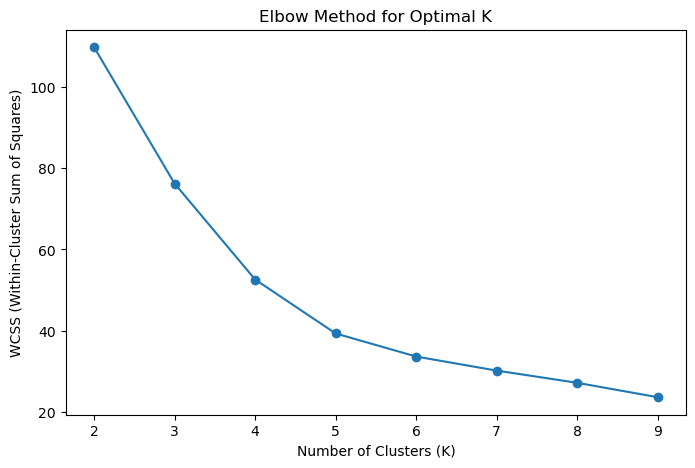

In [66]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model
wcss = []
k_values = range(2, 10)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df[numerical_cols])
    wcss.append(kmeans.inertia_)

# Plot Elbow Graph
plt.figure(figsize=(8, 5))
plt.plot(k_values, wcss, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.title('Elbow Method for Optimal K')
plt.show()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [67]:
# Visualizing evaluation Metric Score chart
optimal_k = 4  # or 5 based on your judgment
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['KMeans_Cluster'] = kmeans.fit_predict(df[numerical_cols])

df[['Cost', 'Rating', 'KMeans_Cluster']].head()

,Cost,Rating,KMeans_Cluster
0,-0.120990,1.373349,3
1,-0.120990,2.224627,0
2,0.863815,2.143553,0
3,-0.120990,-0.795385,1
4,0.666854,1.494960,0


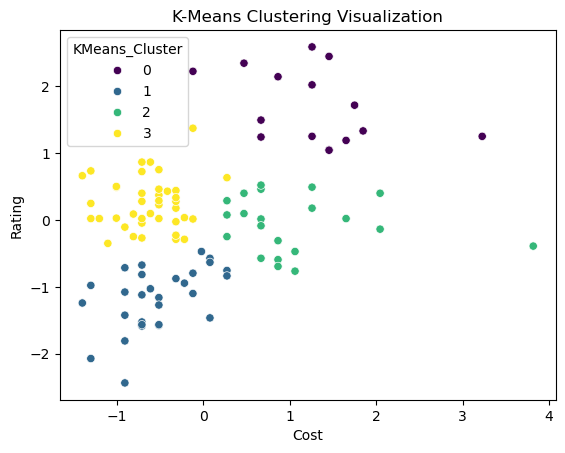

In [68]:
sns.scatterplot(x=df['Cost'], y=df['Rating'], hue=df['KMeans_Cluster'], palette='viridis')
plt.title('K-Means Clustering Visualization')
plt.show()


#### 2. Cross- Validation & Hyperparameter Tuning

In [73]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model
tfidf_matrix = np.vstack(df['TFIDF_Review'].values)  

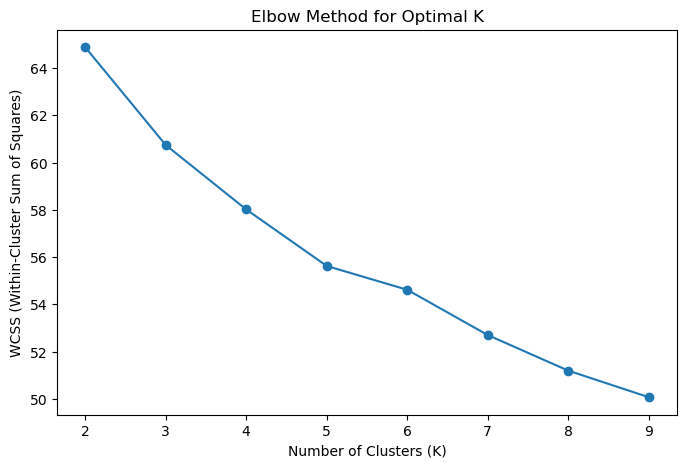

In [74]:
wcss = []
k_values = range(2, 10)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(tfidf_matrix)  # Use fixed TF-IDF matrix
    wcss.append(kmeans.inertia_)

# Plot elbow method
plt.figure(figsize=(8, 5))
plt.plot(k_values, wcss, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.title('Elbow Method for Optimal K')
plt.show()

In [77]:
optimal_k = 5  # Select based on elbow method
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['Review_Rating'] = kmeans.fit_predict(tfidf_matrix)

df[['Name', 'TFIDF_Cluster']].head()

,Name,TFIDF_Cluster
0,beyond flavour,3
1,paradise,2
2,flechazo,3
3,shah ghouse hotel restaurant,2
4,moon brew company,3


##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

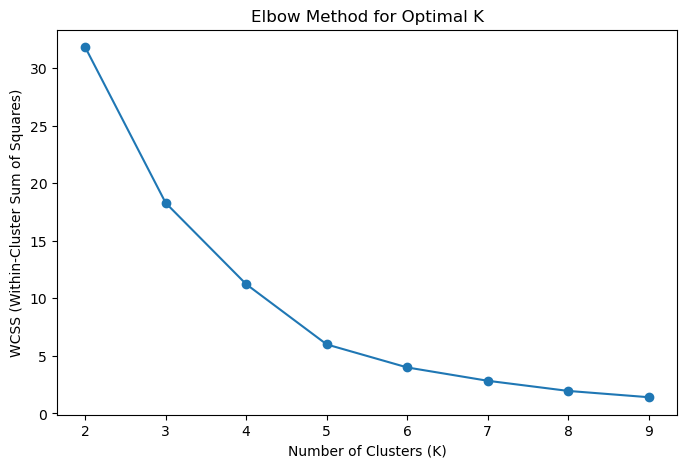

In [95]:
# Visualizing evaluation Metric Score chart
# Select only the timing-related one-hot encoded columns
features = ['Cost'] + [col for col in df.columns if 'Cuisine_' in col]
X = df[features]

# Determine the optimal number of clusters using the Elbow Method
wcss = []
k_values = range(2, 10)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(k_values, wcss, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.title('Elbow Method for Optimal K')
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [96]:
# Define categorical feature indices (Timings are categorical, Cost is numeric)
optimal_k = 5  # Change this based on the elbow method result
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X)

# Assign meaningful names to clusters based on cost and cuisine patterns
cluster_names = {
    0: "Budget Street Food",
    1: "Mid-Range Fast Food",
    2: "Premium Fine Dining",
    3: "Healthy & Vegan Options",
    4: "Luxury International Cuisine"
}

df['Cluster Name'] = df['Cluster'].map(cluster_names)

# Display sample results
df[['Name', 'Cost', 'Cluster Name']].head(20)

,Name,Cost,Cluster Name
0,beyond flavour,-0.120990,Budget Street Food
1,paradise,-0.120990,Budget Street Food
2,flechazo,0.863815,Luxury International Cuisine
3,shah ghouse hotel restaurant,-0.120990,Budget Street Food
4,moon brew company,0.666854,Luxury International Cuisine
5,fisherman wharf,1.257737,Mid-Range Fast Food
6,eatfit,-0.711873,Premium Fine Dining
7,shah ghouse spl shawarma,-1.105796,Premium Fine Dining
8,hyper local,0.272932,Luxury International Cuisine
9,cream stone,-1.007315,Premium Fine Dining


##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [101]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model
# Selecting features
X = df[['Cost', 'Rating']]

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

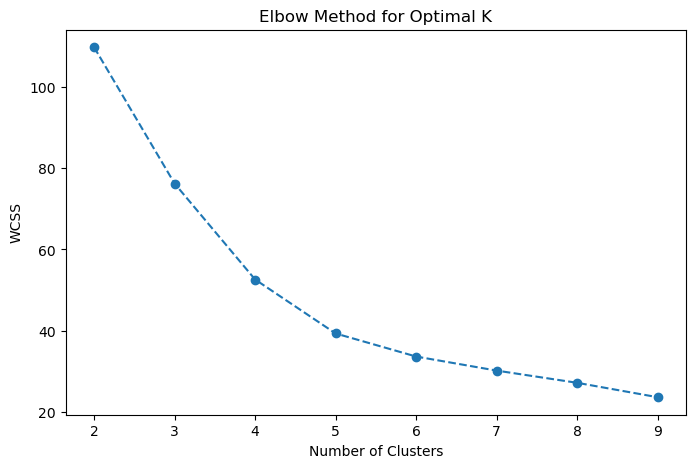

In [103]:
# Visualizing evaluation Metric Score chart
wcss = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(8, 5))
plt.plot(range(2, 10), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal K')
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [104]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
optimal_k = 4  # Choose based on elbow plot
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['Cost_rating'] = kmeans.fit_predict(X_scaled)
# Fit the Algorithm

# Predict on the model

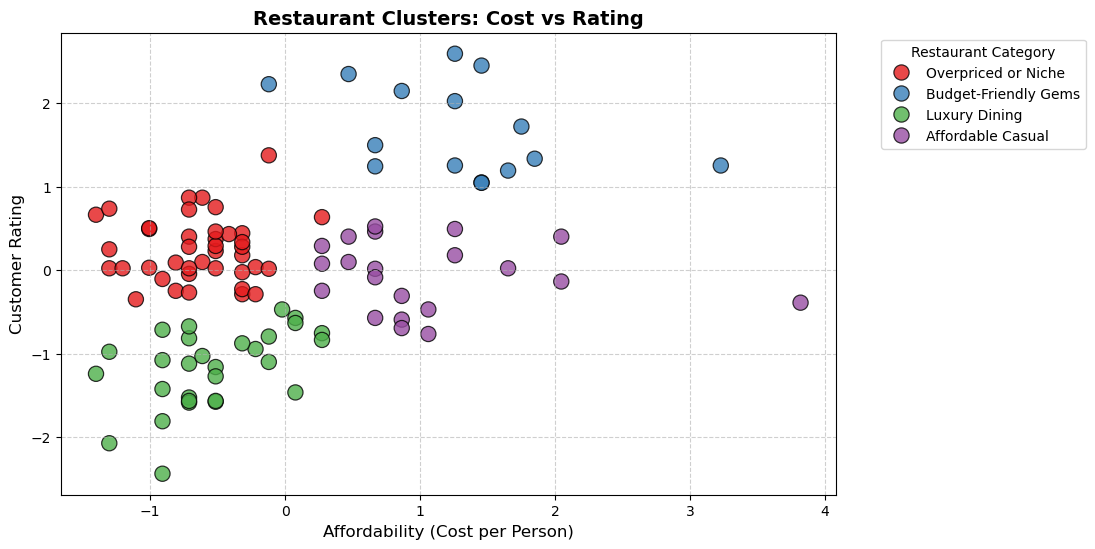

In [107]:
# Define category labels for clusters
cluster_labels = {
    0: 'Budget-Friendly Gems',       # Low-cost, high-rated
    1: 'Luxury Dining',              # High-cost, high-rated
    2: 'Affordable Casual',          # Mid-cost, decent-rated
    3: 'Overpriced or Niche'         # High-cost, low-rated
}

# Map cluster labels in DataFrame
df['Category'] = df['Cost_rating'].map(cluster_labels)

plt.figure(figsize=(10, 6))

# Scatter plot with category labels
sns.scatterplot(x=df['Cost'], y=df['Rating'], hue=df['Category'], palette='Set1', s=120, edgecolor='black', alpha=0.8)

# Titles and labels
plt.xlabel('Affordability (Cost per Person)', fontsize=12)
plt.ylabel('Customer Rating', fontsize=12)
plt.title('Restaurant Clusters: Cost vs Rating', fontsize=14, fontweight='bold')

# Move legend outside
plt.legend(title='Restaurant Category', bbox_to_anchor=(1.05, 1), loc='upper left')

# Grid for better visualization
plt.grid(True, linestyle='--', alpha=0.6)

plt.show()

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***